Se realizara el analisis de cómo ciertos genes pueden ayudar a diferenciar entre diferentes clases o grupos dentro de un conjunto de datos.

Para eso importaremos nuestra base de datos, que consiste de
83 muestras y 2308 variables y La variable de salida cuenta con valores numéricos del 1 al 4 que corresponden a distintos tipos de cáncer. A su vez revisaremos si esta base de datos tiene algun hueco que llenar. Por ultimo sacaremos las variables con más diferencia de promedios entre las clases 2 y 4 para todos los genes, e imprimiremos los 10 genes con la mayor diferencia de medias.

In [77]:
import pandas as pd
import numpy as np

df=pd.read_csv("A3.1 Khan.csv")
print("Cantidad de huecos:\n",df.isnull().sum())
X_genes = df.columns.drop('y')

m2 = df.loc[df["y"] == 2, X_genes].mean()
m4 = df.loc[df["y"] == 4, X_genes].mean()
res = pd.DataFrame({"mean_2": m2, "mean_4": m4})
res["diff_2_minus_4"] = res["mean_2"] - res["mean_4"]
top10 = res.reindex(res["diff_2_minus_4"].abs().sort_values(ascending=False).head(10).index)
print("Top 10 variables mas importantes:\n", top10)



Cantidad de huecos:
 X1       0
X2       0
X3       0
X4       0
X5       0
        ..
X2305    0
X2306    0
X2307    0
X2308    0
y        0
Length: 2309, dtype: int64
Top 10 variables mas importantes:
          mean_2    mean_4  diff_2_minus_4
X187  -1.487488  1.835663       -3.323151
X509  -0.707556  2.198982       -2.906537
X2046 -1.711089  0.713426       -2.424515
X2050 -2.237496  0.164287       -2.401783
X129  -1.759748  0.405437       -2.165185
X1645  0.932217 -1.133242        2.065460
X1319  0.464020 -1.581922        2.045941
X1955 -0.912812  1.124528       -2.037340
X1003 -1.807854  0.203483       -2.011337
X246   1.161029 -0.676801        1.837830


Como podemos observar no se observar ningun hueco en las viarbles que poseemos asi que podemos proseguir y obtener la diferenica. De estas variuables al notar sus diferencias, podemos inferer que tienen un rol importante a la hora de hacer la distnicion entre las clases, haciendo posible que se pueda identificar de manera mas solida algun dato en especifico.
Tambien puede sugerir que pueden ser utilizados en un análisis estadístico formal, como una prueba t o ANOVA para verificar si esas diferencias son estadísticamente significativas.

Ahora relaizarmos un calculo como ya mencionamos del estadistico t en conjunto del p-value, todo esto para comparar las medias de todos los genes que contamos en la clase 2 y 4.

Ahora relizaremos tres diferentes metodologías las cuales seran
* Bonferroni,
* Holm
* Benjamini-Hochberg

Todo esto gracias a la funcion ttest_ind y multipletest, haciendo mas facil la obtencion de estos datos y ver cuales son todas las vairables más significativas para estos estudios con un alpha de 0.5.

In [78]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests


g2 = df.loc[df["y"] == 2, X_genes]
g4 = df.loc[df["y"] == 4, X_genes]

t_vals, p_vals = ttest_ind(g2.to_numpy(), g4.to_numpy(), axis=0, equal_var=False)


tests = pd.DataFrame({"gene": X_genes, "t_stat": t_vals, "p_value": p_vals}).set_index("gene")

prueba_bonf, p_bonf, _, _ = multipletests(tests["p_value"], alpha=0.05, method="bonferroni")
prueba_holm, p_holm, _, _ = multipletests(tests["p_value"], alpha=0.05, method="holm")
prueba_bh,   p_bh,   _, _ = multipletests(tests["p_value"], alpha=0.05, method="fdr_bh")

tests["p_bonf"] = p_bonf; tests["sig_bonf"] = prueba_bonf
tests["p_holm"] = p_holm; tests["sig_holm"] = prueba_holm
tests["p_bh"]   = p_bh;   tests["sig_bh"]   = prueba_bh


significative_bonf = tests.index[tests["sig_bonf"]].tolist()
significative_holm = tests.index[tests["sig_holm"]].tolist()
significative_bh   = tests.index[tests["sig_bh"]].tolist()

print("\nSignificancia a α=0.05")
print("Bonferroni:", len(significative_bonf) ,"genes:", significative_bonf)
print("Holm:", len(significative_holm) ,"genes:", significative_holm)
print("BH (FDR):",   len(significative_bh), "genes:", significative_bh)



Significancia a α=0.05
Bonferroni: 72 genes: ['X2', 'X36', 'X67', 'X129', 'X174', 'X187', 'X188', 'X229', 'X246', 'X251', 'X338', 'X348', 'X368', 'X372', 'X373', 'X380', 'X430', 'X433', 'X509', 'X545', 'X554', 'X558', 'X566', 'X603', 'X655', 'X714', 'X762', 'X910', 'X951', 'X971', 'X1003', 'X1021', 'X1023', 'X1055', 'X1070', 'X1093', 'X1105', 'X1110', 'X1112', 'X1132', 'X1194', 'X1196', 'X1207', 'X1217', 'X1298', 'X1319', 'X1327', 'X1330', 'X1372', 'X1389', 'X1416', 'X1610', 'X1626', 'X1634', 'X1645', 'X1706', 'X1708', 'X1723', 'X1738', 'X1799', 'X1888', 'X1896', 'X1911', 'X1924', 'X1954', 'X1955', 'X1980', 'X2046', 'X2050', 'X2115', 'X2146', 'X2247']
Holm: 72 genes: ['X2', 'X36', 'X67', 'X129', 'X174', 'X187', 'X188', 'X229', 'X246', 'X251', 'X338', 'X348', 'X368', 'X372', 'X373', 'X380', 'X430', 'X433', 'X509', 'X545', 'X554', 'X558', 'X566', 'X603', 'X655', 'X714', 'X762', 'X910', 'X951', 'X971', 'X1003', 'X1021', 'X1023', 'X1055', 'X1070', 'X1093', 'X1105', 'X1110', 'X1112', 'X113

Podemos observar que la metodologia Bonferroni y Holm, practicamente, proporcionaron las mismas variables significativas, pero para BH se optuvo muchas mas variables signficativas.

Ahora, de manera similiar, pero ahora comprando las medias con las 4 clases que tenemos en nuestra variable "y". Para esto nos centraremos en la metodlogía de analisis de varianaza ANOVA. Para esto utilizaremos la función f_oneway de scipy.stats.

In [79]:
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests


c = [df[df['y'] == k][X_genes] for k in [1, 2, 3, 4]]

anova = pd.DataFrame({'gene': X_genes})
anova['p'] = [
    f_oneway(*[ci[g].dropna() for ci in c])[1] if all(ci[g].dropna().size > 0 for ci in c) else np.nan
    for g in X_genes
]
anova = anova.set_index('gene').sort_values('p')

# Codigo ayudado por ChatGPT /
mask = anova['p'].notna()
for method, colp, colsig in [('bonferroni','p_bonf','sig_bonf'),
                             ('holm','p_holm','sig_holm'),
                             ('fdr_bh','p_bh','sig_bh')]:
    rej, p_adj, _, _ = multipletests(anova.loc[mask,'p'], alpha=0.05, method=method)
    anova.loc[mask, colp] = p_adj
    anova[colsig] = False
    anova.loc[mask, colsig] = rej
# /
print("Top 10 por p (sin ajuste):")
print(anova[['p']].head(10))
print("\nSignificativos Bonferroni:", int(anova['sig_bonf'].sum()))
print("Significativos Holm:",       int(anova['sig_holm'].sum()))
print("Significativos BH (FDR):",   int(anova['sig_bh'].sum()))


Top 10 por p (sin ajuste):
                  p
gene               
X1955  1.459035e-24
X1389  1.772751e-24
X1003  1.618988e-23
X2050  4.733702e-22
X246   6.633722e-22
X742   2.195548e-21
X1     3.839240e-20
X2162  1.035143e-19
X1954  2.182635e-19
X1645  2.988392e-19

Significativos Bonferroni: 404
Significativos Holm: 412
Significativos BH (FDR): 1162


Como podemos observar hay mayor cantidad de variables significativas a comparacion a los metodos anteriores, esto no significa que un metodo sea mejor que otro a simple viste, puesto a que ahora utilizamos las 4 clases que nos proporciona nuestra varuable "y" asi que es normal tener más variables significativas.

Por ultimo entrenaremos un modelo de SVM con
un kernel lineal, con un kernel polinomial de orden 3, y con un kernel radial. Al obtener cada medoto de Kernel, imprimiremos su Accuracy, F1_score y su matriz de confusion para podere compararlas entre si y ver cual es mejor.


Resultados para el kernel linear
Accuracy: 1.0
F1 Score: 1.0
Matris de confusion:
 [[2 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]

Resultados para el kernel poly
Accuracy: 0.5294117647058824
F1 Score: 0.5305555555555556
Matris de confusion:
 [[1 1 0 0]
 [0 5 0 1]
 [0 3 1 0]
 [0 3 0 2]]

Resultados para el kernel rbf
Accuracy: 0.8823529411764706
F1 Score: 0.899891774891775
Matris de confusion:
 [[2 0 0 0]
 [0 5 0 1]
 [0 0 3 1]
 [0 0 0 5]]


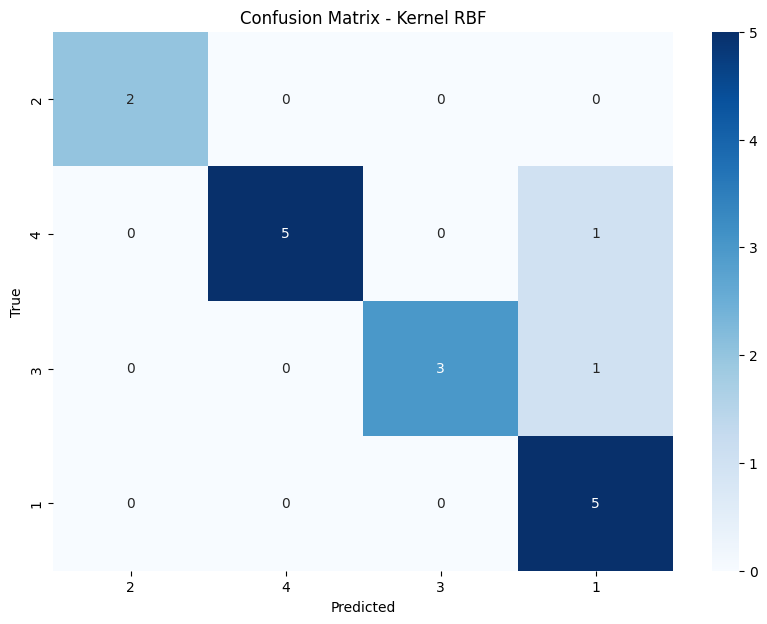

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['y'])
Y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Codigo ayudado por ChatGPT /
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    model = make_pipeline(StandardScaler(), SVC(kernel=kernel, random_state=42, C=1.0, gamma='scale'))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[kernel] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'conf_matrix': conf_matrix,
        'predictions': y_pred
    }
# /

for kernel in results:
    print("\nResultados para el kernel", kernel)
    print("Accuracy:", results[kernel]['accuracy'])
    print("F1 Score:",  results[kernel]['f1_score'])
    print("Matris de confusion:\n",results[kernel]['conf_matrix'])

plt.figure(figsize=(10,7))
sns.heatmap(results['rbf']['conf_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix - Kernel RBF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Como podemos observar, hay algo raro en el Accuracy y F1 del Kernel Lineal, asi que para myaor presicion, obtendremos mas parametros de medicion y decidiremos cual es mejor para los resultados que buscamos.

In [81]:
from sklearn.metrics import precision_score, recall_score
metrics = {}
for kernel in kernels:
    y_pred = results[kernel]['predictions']

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    metrics[kernel] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'conf_matrix': conf_matrix
    }

# Mostrar las métricas para each model
for kernel in metrics:
    print("\nKernel", kernel)
    print("Accuracy:", metrics[kernel]['accuracy'])
    print("F1 Score:", metrics[kernel]['f1_score'])
    print("Precision:", metrics[kernel]['precision'])
    print("Recall:", metrics[kernel]['recall'])
    print("Matriz de Confusion:\n",metrics[kernel]['conf_matrix'])


Kernel linear
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Matriz de Confusion:
 [[2 0 0 0]
 [0 6 0 0]
 [0 0 4 0]
 [0 0 0 5]]

Kernel poly
Accuracy: 0.5294117647058824
F1 Score: 0.5305555555555556
Precision: 0.7708333333333334
Recall: 0.49583333333333335
Matriz de Confusion:
 [[1 1 0 0]
 [0 5 0 1]
 [0 3 1 0]
 [0 3 0 2]]

Kernel rbf
Accuracy: 0.8823529411764706
F1 Score: 0.899891774891775
Precision: 0.9285714285714286
Recall: 0.8958333333333334
Matriz de Confusion:
 [[2 0 0 0]
 [0 5 0 1]
 [0 0 3 1]
 [0 0 0 5]]


Despues de ampliar las metricas y no solo accuracy y F1, vemos que aun asi salen muy parecidad. Analizando más a detalle, tenemos que el Kernel Lineal es de 1 para cualquiera de sus metricas, lo cual nos indica que siempre va a predecir de manera ante cualquier dato.

Aunque esto sea un hecho, es extremadamente raro que pase, ya que siempre predecir de manera correcta y que ninguna de las otras metricas arroje un minimo error, significa 2 cosas, o que realmente nuestros datos si son posibles de predecir de manera extremadamente sencilla, o que estaban los datos demaciado desbalanzeados y demaciadas variables para la cantidad de datos, por lo que viendo que es demaciado extraño para tomar una desicion asegurada no lo escojeremos como el mejor metodo de kernel.

En cambio viendo los demas parametros, el Kernel de RBF es el que tiene los mejores parametros asi que utilizaremos a este para usar en esta tarea.